In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("singapore.csv")
df.columns=["Year",'Type','Age_Group','Count']


In [3]:
print(df.head(3))


   Year             Type      Age_Group   Count
0  1957  Total Residents  0  -  4 Years  264727
1  1957  Total Residents  5  -  9 Years  218097
2  1957  Total Residents  10 - 14 Years  136280


In [4]:

df.replace({'na': np.nan}, inplace=True)         #replacing the 'na' values in the count column 

df['Count']=df['Count'].astype("Float32")        #converting count to float

df=df.fillna(method ='pad')                      #replacing NaN values with previous values


ethinicity_df=df.loc[(df['Type'] == 'Total Malays') | (df['Type'] == 'Total Chinese')
                     |(df['Type'] == 'Total Indians')|(df['Type'] == 'Other Ethnic Groups (Total)')]

ethinicity_df = ethinicity_df[(ethinicity_df.Age_Group != '65 Years & Over')&
            (ethinicity_df.Age_Group != '70 Years & Over')&
            (ethinicity_df.Age_Group != '75 Years & Over')&(ethinicity_df.Age_Group != '80 Years & Over')]



total_malays=[]                    #stores sum of malays of all age groups for each year 
total_chinese=[]
total_indians=[]
total_others=[]


x=[i for i in range(1957,2019)]    #list of all the years(basically used for plotting)

for year in x:
    malays=ethinicity_df.loc[(ethinicity_df['Year'] == year) & (ethinicity_df['Type'] == 'Total Malays'), 'Count'].sum()
    total_malays.append(malays)
    chinese=ethinicity_df.loc[(ethinicity_df['Year'] == year) & (ethinicity_df['Type'] == 'Total Chinese'), 'Count'].sum()
    total_chinese.append(chinese)
    indians=ethinicity_df.loc[(ethinicity_df['Year'] == year) & (ethinicity_df['Type'] == 'Total Indians'), 'Count'].sum()
    total_indians.append(indians)
    others=ethinicity_df.loc[(ethinicity_df['Year'] == year) & (ethinicity_df['Type'] == "Other Ethnic Groups (Total)"), 'Count'].sum()
    total_others.append(others)



import matplotlib.pyplot as plt
plt.plot(x,total_malays,label='Total Malays')
plt.plot(x,total_chinese,label="Total Chinese")
plt.plot(x,total_indians,label="Total Indians")
plt.plot(x,total_others,label="Total Other ethnic grps")
plt.xlabel('Years')
plt.ylabel('total population by ethinicity')
plt.legend()
print(" From the Plotted Data it is evident that the largest Ethnic Group in Singapore is that of the CHINESE ")


 From the Plotted Data it is evident that the largest Ethnic Group in Singapore is that of the CHINESE 


In [5]:
                          # Average growth rate for each ethinic group
    
    

Malay_AGR= (total_malays[-1]-total_malays[0])//62        # malay_Average_growth_rate

Chinese_AGR=(total_chinese[-1]-total_chinese[0])//62     # chinese_Average_growth_rate

Indians_AGR=(total_indians[-1]-total_indians[0])//62     # Indian_Average_growth_rate

Others_AGR=(total_others[-1]-total_others[0])//62        # Others_Average_growth_rate

print("Average Growth rate of Malay population over the Period of 62 years is :",Malay_AGR)
print("Average Growth rate of Chinese population over the Period of 62 years is :",Chinese_AGR)
print("Average Growth rate of Indian population over the Period of 62 years is :",Indians_AGR)
print("Average Growth rate of Other Ethinic Group population over the Period of 62 years is :",Others_AGR)

Average Growth rate of Malay population over the Period of 62 years is : 5463.0
Average Growth rate of Chinese population over the Period of 62 years is : 30301.0
Average Growth rate of Indian population over the Period of 62 years is : 3813.0
Average Growth rate of Other Ethinic Group population over the Period of 62 years is : 1523.0


Text(0, 0.5, 'percentage %')

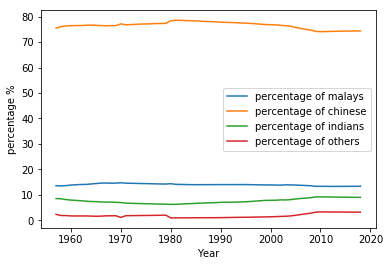

In [6]:
# Proportion contributed by each of the ethnic groups

malay_percent=[]
chinese_percent=[]
indian_percent=[]
other_percent=[]
for i in range (62):
    n1=total_malays[i]                    #n1,n2,n3,n4 store the total counts of each ethnic group for each year
    n2=total_chinese[i]
    n3=total_indians[i]
    n4=total_others[i]
    total_pop=(n1 + n2 + n3 + n4)         #total population for a particular year
    
    malay_percent.append(float('{0:.2f}'.format((n1/total_pop)*100)))           #calculationg percentage 
    chinese_percent.append(float('{0:.2f}'.format((n2/total_pop)*100)))
    indian_percent.append(float('{0:.2f}'.format((n3/total_pop)*100)))
    other_percent.append(float('{0:.2f}'.format((n4/total_pop)*100)))

plt.plot(x,malay_percent,label="percentage of malays")
plt.plot(x,chinese_percent,label="percentage of chinese")
plt.plot(x,indian_percent,label="percentage of indians")
plt.plot(x,other_percent,label="percentage of others")
plt.legend()
plt.xlabel("Year")
plt.ylabel("percentage %")

In [7]:
# analysis on age groups

age_df=df.loc[(df['Type'] == 'Total Residents') & (df['Age_Group'] != '65 Years & Over') & (df['Age_Group'] != '70 Years & Over')
             & (df['Age_Group'] != '75 Years & Over') & (df['Age_Group'] != '80 Years & Over')]
print(age_df.head(5))

   Year             Type      Age_Group     Count
0  1957  Total Residents  0  -  4 Years  264727.0
1  1957  Total Residents  5  -  9 Years  218097.0
2  1957  Total Residents  10 - 14 Years  136280.0
3  1957  Total Residents  15 - 19 Years  135679.0
4  1957  Total Residents  20 - 24 Years  119266.0


Text(0, 0.5, 'Count')

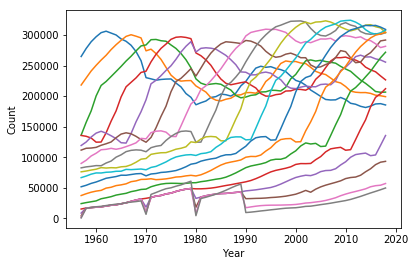

In [8]:
age_groups=(age_df['Age_Group'].unique()).tolist()



age_dict={}
for group in age_groups:
    age_dict[group]=(age_df[(age_df['Age_Group']==group)]['Count']).tolist()   
    

for item in age_dict:
    plt.plot(x,age_dict[item],label=item)
plt.xlabel("Year")
plt.ylabel('Count')

In [9]:
# we can see that such a graph doesn't properly gives an insight of the data 
# for age groups so we need to broaden our scope

In [10]:
df_new=pd.DataFrame(columns=('0-14','15-29','30-44','45-59','60-74','75 and above'))

for i in range (62):
    a=age_dict[age_groups[0]][i] + age_dict[age_groups[1]][i] + age_dict[age_groups[2]][i]
    b=age_dict[age_groups[3]][i] + age_dict[age_groups[4]][i] + age_dict[age_groups[5]][i]
    c=age_dict[age_groups[6]][i] + age_dict[age_groups[7]][i] + age_dict[age_groups[8]][i]
    d=age_dict[age_groups[9]][i] + age_dict[age_groups[10]][i] + age_dict[age_groups[11]][i]
    e=age_dict[age_groups[12]][i] + age_dict[age_groups[13]][i] + age_dict[age_groups[14]][i]
    f=age_dict[age_groups[15]][i] + age_dict[age_groups[16]][i] + age_dict[age_groups[17]][i]
    new_row={'0-14':a,'15-29':b,'30-44':c,'45-59':d,'60-74':e,'75 and above':e}
    df_new=df_new.append(new_row,ignore_index=True)
print(df_new.head(10))

       0-14     15-29     30-44     45-59    60-74  75 and above
0  619104.0  366671.0  248851.0  155966.0  48449.0       48449.0
1  664500.0  373900.0  256900.0  163900.0  60100.0       60100.0
2  705500.0  379700.0  266400.0  172600.0  62900.0       62900.0
3  747600.0  380400.0  273500.0  178700.0  65500.0       65500.0
4  780000.0  387000.0  281600.0  182800.0  70200.0       70200.0
5  796700.0  401500.0  286000.0  190800.0  74400.0       74400.0
6  811000.0  419200.0  291400.0  194000.0  78800.0       78800.0
7  824100.0  438300.0  296000.0  199300.0  82800.0       82800.0
8  833100.0  460300.0  303100.0  202800.0  87700.0       87700.0
9  844500.0  478400.0  311600.0  207400.0  92300.0       92300.0


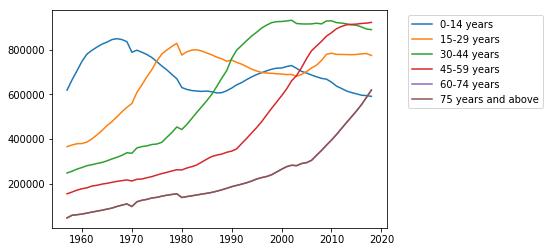

In [11]:
#plotting for the new age groups created
plt.plot(x,df_new['0-14'],label='0-14 years')
plt.plot(x,df_new['15-29'],label='15-29 years')
plt.plot(x,df_new['30-44'],label='30-44 years')
plt.plot(x,df_new['45-59'],label='45-59 years')
plt.plot(x,df_new['60-74'],label='60-74 years')
plt.plot(x,df_new['75 and above'],label='75 years and above')
plt.legend(bbox_to_anchor=(1.05, 1))


In [12]:
#Insights-     1. the age group of 30-44 years seems to contribute most to the population of singapore.
#              2. Mid age group had a steep rise from late 1990s.
#              3. Birth rate has shown a variable trend but overall it tends to decrease(depicting increasing literacy rate or rules imposed by the government to have less number of children)
#              4. Old aged group shows an exponential growth which proves the betterment in medical facilities and healthy living conditions.


In [13]:
#average population growth of each age group 
for group in age_groups:
    print("average growth rate of age group ",group, "is ", ('{0:.2f}'.format((age_dict[group][-1]-age_dict[group][0])/62)))
    
# a negative value of average growth rate shows the average decrease in the population that particular age group.
# Highest average growth rate was depicted the the age group of 55-59 years.
#lowest growth rate is for the age group of 0-4 years.

average growth rate of age group  0  -  4 Years is  -1277.40
average growth rate of age group  5  -  9 Years is  -306.95
average growth rate of age group  10 - 14 Years is  1133.06
average growth rate of age group  15 - 19 Years is  1465.18
average growth rate of age group  20 - 24 Years is  2197.58
average growth rate of age group  25 - 29 Years is  2901.69
average growth rate of age group  30 - 34 Years is  3088.26
average growth rate of age group  35 - 39 Years is  3564.69
average growth rate of age group  40 - 44 Years is  3668.11
average growth rate of age group  45 - 49 Years is  3889.06
average growth rate of age group  50 - 54 Years is  4147.92
average growth rate of age group  55 - 59 Years is  4305.39
average growth rate of age group  60 - 64 Years is  3990.52
average growth rate of age group  65 - 69 Years is  3172.61
average growth rate of age group  70 - 74 Years is  2044.71
average growth rate of age group  75 - 79 Years is  1437.13
average growth rate of age group  80 - 

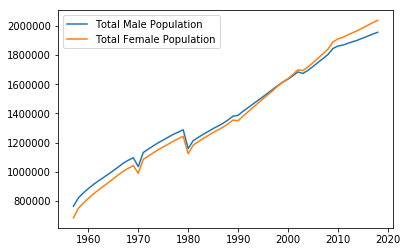

In [16]:
#analysis based on gender
gender_df=df.loc[((df['Type'] == 'Total Male Residents') |(df['Type'] == 'Total Female Residents')) & (df['Age_Group'] != '65 Years & Over') & (df['Age_Group'] != '70 Years & Over')
             & (df['Age_Group'] != '75 Years & Over') & (df['Age_Group'] != '80 Years & Over')]



gender_df=pd.DataFrame(gender_df.groupby(['Year','Type']).sum().reset_index())



Females=(gender_df[(gender_df['Type']=='Total Female Residents')]['Count']).tolist()

Males=(gender_df[(gender_df['Type']=='Total Male Residents')]['Count']).tolist()

plt.plot(x,Males,label='Total Male Population')
plt.plot(x,Females,label='Total Female Population')
plt.legend()

In [21]:
#clearly the growth rate for females is higher.
print('average growth of females is ', ('{0:.2f}'.format((Females[-1]-Females[0])/62)))
print('average growth of males is ', ('{0:.2f}'.format((Males[-1]-Males[0])/62)))

average growth of females is  21859.29
average growth of males is  19243.19
